# init

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # for XGBoost

import pickle
import cloudpickle
import cv2

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt 
import japanize_matplotlib

from datetime                import datetime

from sklearn.ensemble        import RandomForestClassifier
from xgboost                 import XGBClassifier
from lightgbm                import LGBMClassifier
from catboost                import CatBoostClassifier
from sklearn.linear_model    import LogisticRegression

from sklearn                 import datasets
from sklearn.model_selection import train_test_split
from copy                    import copy
from umap                    import UMAP

np.random.seed(0)


/home/mucunwuxian/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
import torch
import torch.nn as nn
import torch.optim as optimizers
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms
from torch import optim
from torch.optim import Adam


In [4]:
# 
torch.manual_seed(0)

# 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cuda


In [5]:
# import domestic lib
import ppap.tabular_utility      as ppap_tbl_utl
import ppap.image_utility        as ppap_img_utl
import ppap.image_classification as ppap_img_cls

import importlib
importlib.reload(ppap_tbl_utl)
importlib.reload(ppap_img_utl)
importlib.reload(ppap_img_cls)


<module 'ppap.image_classification' from '/home/mucunwuxian/20191125_PPAP/ppap/image_classification.py'>

(28, 28)
255
0
[0.07142857 0.17857143 0.28571429 0.39285714]
2
-8
5
-11


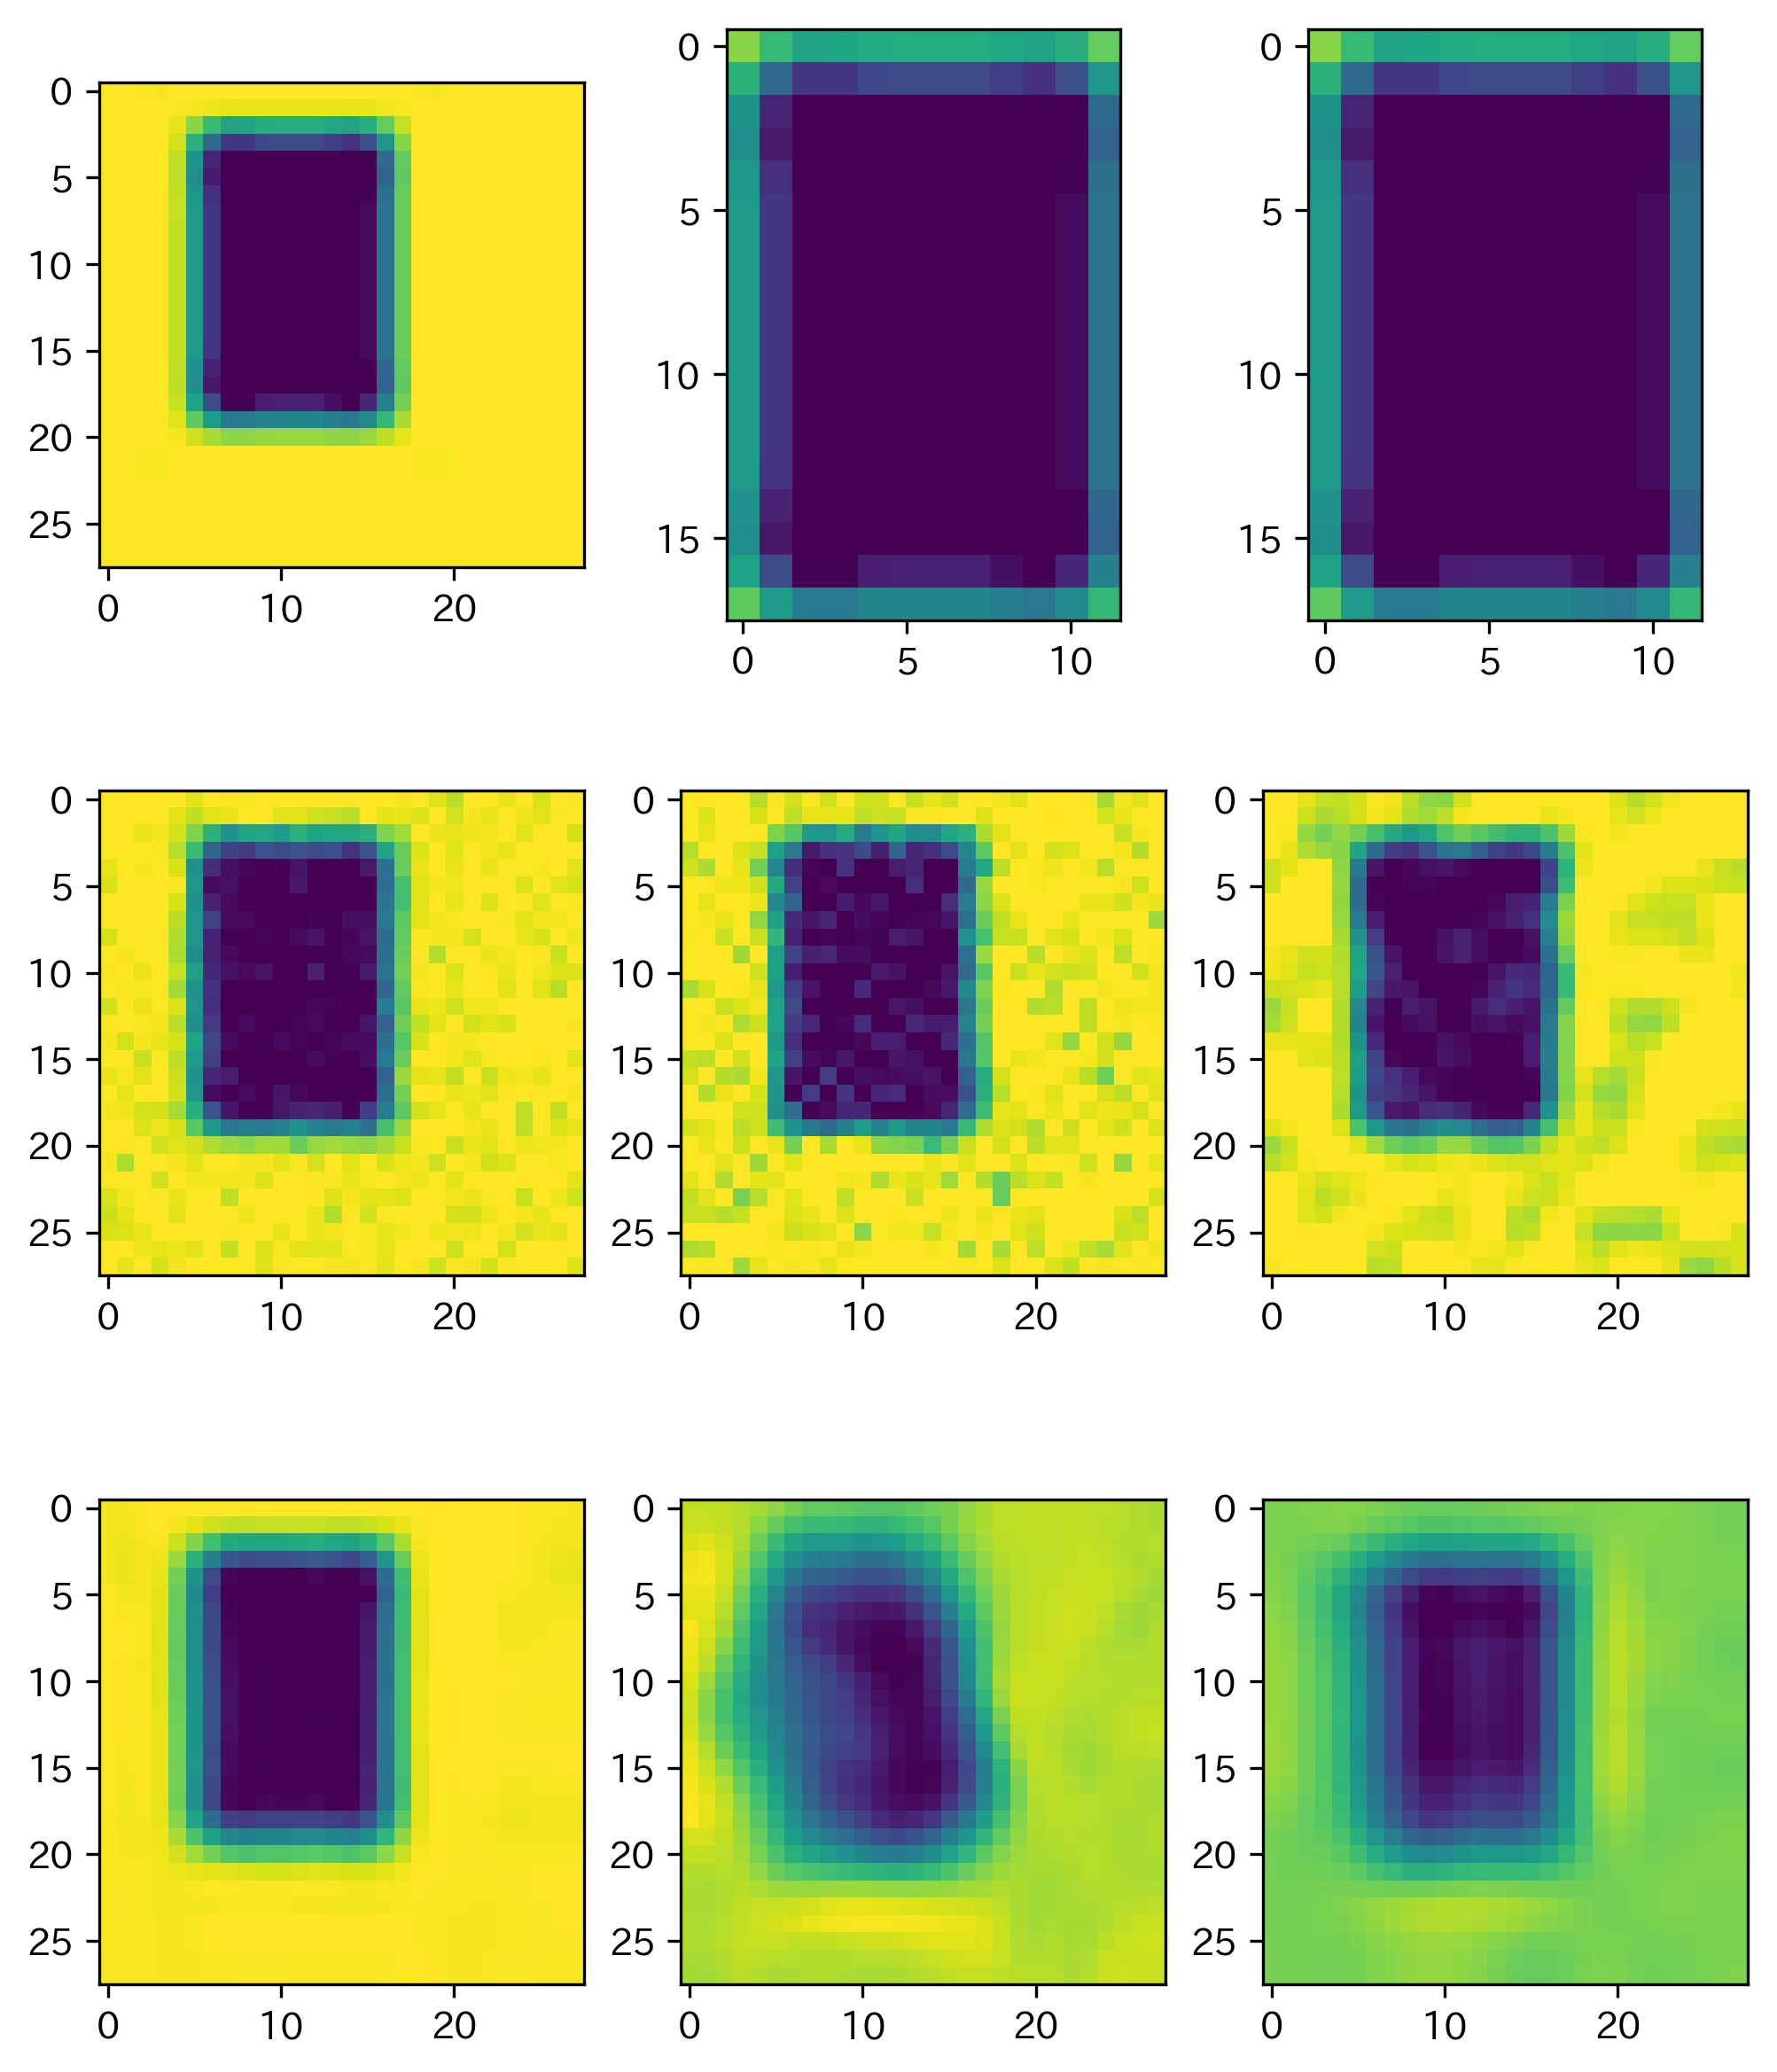

In [6]:
# test
tmp             = np.ones([10, 10], dtype=np.uint8) * 255
tmp[1:-3, 2:-4] = 0
tmp             = ppap_img_utl.imresize(tmp, height_pixel=28)
print(np.shape(tmp))
print(np.max(tmp))
print(np.min(tmp))

# 
plt.figure(figsize=(8,10),dpi=300)
plt.subplot(3, 3, 1)
plt.imshow(tmp, clim=[0, 255])

# 
(tmp_, adjust_ratio_tmp) = ppap_img_utl.imtrimming(tmp)

# 
print(adjust_ratio_tmp)

# 
plt.subplot(3, 3, 2)
plt.imshow(tmp_, clim=[0, 255])

vert_from = int(np.round(np.shape(tmp)[0]  * adjust_ratio_tmp[0]))
vert_to   = -int(np.round(np.shape(tmp)[0] * adjust_ratio_tmp[2]))
horz_from = int(np.round(np.shape(tmp)[1]  * adjust_ratio_tmp[1]))
horz_to   = -int(np.round(np.shape(tmp)[1] * adjust_ratio_tmp[3]))
print(vert_from)
print(vert_to)
print(horz_from)
print(horz_to)

# 
tmp___ = tmp[vert_from:vert_to, horz_from:horz_to]

# 
plt.subplot(3, 3, 3)
plt.imshow(tmp___, clim=[0, 255])

# 
tmp____   = ppap_img_utl.add_gaussian_noise(tmp, mean=0, sigma=10)
tmp_____  = ppap_img_utl.add_gaussian_noise(tmp, mean=0, sigma=20)
tmp______ = ppap_img_utl.add_gaussian_noise(tmp, mean=0, sigma=20, roughness=2)

# 
plt.subplot(3, 3, 4)
plt.imshow(tmp____, clim=[0, 255])

# 
plt.subplot(3, 3, 5)
plt.imshow(tmp_____, clim=[0, 255])

# 
plt.subplot(3, 3, 6)
plt.imshow(tmp______, clim=[0, 255])

# 
tmp_______   = ppap_img_utl.imaugment_for_char(img=tmp[np.newaxis, :, :], 
                                               window_size_vert=np.shape(tmp)[0])
tmp________  = ppap_img_utl.imaugment_for_char(img=tmp[np.newaxis, :, :], 
                                               window_size_vert=np.shape(tmp)[0])
tmp_________ = ppap_img_utl.imaugment_for_char(img=tmp[np.newaxis, :, :], 
                                               window_size_vert=np.shape(tmp)[0])

# 
plt.subplot(3, 3, 7)
plt.imshow(tmp_______[0], clim=[0, 255])

# 
plt.subplot(3, 3, 8)
plt.imshow(tmp________[0], clim=[0, 255])

# 
plt.subplot(3, 3, 9)
plt.imshow(tmp_________[0], clim=[0, 255])

plt.show()


In [7]:
# refer from [https://qiita.com/daenqiita/items/be92e332fb029bacd795]

import time

def tic():
    #require to import time
    global start_time_tictoc
    start_time_tictoc = time.time()


def toc(tag="elapsed time"):
    if "start_time_tictoc" in globals():
        print("{}: {:.5f} sec".format(tag, time.time() - start_time_tictoc), end='')
    else:
        print("tic has not been called")


# Pre-Process

In [8]:
# 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', data_home='./data/mnist')

# prepare X and y
X = mnist.data
X = X.reshape(len(X), 28, 28)
y = mnist.target.astype(np.int)

# 
print('np.shape(X) = (%d, %d, %d)' % np.shape(X))
print('np.max(X)   = %.2f'         % np.max(X))
print('np.shape(y) = (%d)'         % np.shape(y))
print('np.max(y)   = %.2f'         % np.max(y))


np.shape(X) = (70000, 28, 28)
np.max(X)   = 255.00
np.shape(y) = (70000)
np.max(y)   = 9.00


In [9]:
# # [STEP 6-1]
# # visualize on PCA
# _, _, _ = ppap_tbl_utl.understandable_visualize(X = X.reshape(len(X), -1), 
#                                                 y = y)


In [10]:
# # [STEP 7] 
# # judge predictblle or not by kmeans
# (kmeans_result, 
#  _, 
#  idx_sort_k) = ppap_tbl_utl.kmeans_classification(X              = X.reshape(len(X), -1), 
#                                                   y              = y, 
#                                                   column_name    = column_name)


# Prediction

In [11]:
# refer from [https://deepage.net/deep_learning/2016/11/30/resnet.html]

# supposing that [window size = 28]

class CNN_for_classification(nn.Module):
 
    def __init__(self, depth_input, class_num, 
                 depth_base=32, block_num=1, filter_size_base=3, 
                 resnet_mode=True, fully_conv=False):
        super(CNN_for_classification, self).__init__()
        
        self.depth_input      = depth_input
        self.class_num        = class_num
        self.depth_base       = depth_base
        self.block_num        = block_num
        self.filter_size_base = filter_size_base
        self.resnet_mode      = resnet_mode
        self.fully_conv       = fully_conv

        # input
        self.block_C_in_f3x3 = nn.Sequential(
            nn.ReflectionPad2d(padding=1), 
            nn.Conv2d(in_channels=self.depth_input, out_channels=self.depth_base, 
                      kernel_size=(3, 3), padding=0, bias=True),
        )
        self.block_C_in_f5x5 = nn.Sequential(
            nn.ReflectionPad2d(padding=2), 
            nn.Conv2d(in_channels=self.depth_input, out_channels=self.depth_base, 
                      kernel_size=(5, 5), padding=0, bias=True),
        )
        self.block_C_in_f7x7 = nn.Sequential(
            nn.ReflectionPad2d(padding=3), 
            nn.Conv2d(in_channels=self.depth_input, out_channels=self.depth_base, 
                      kernel_size=(7, 7), padding=0, bias=True),
        )
    
        # middle
        self.block_BAC_x1 = nn.Sequential(
            nn.BatchNorm2d(self.depth_base),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=self.depth_base, out_channels=self.depth_base, 
                      kernel_size=(self.filter_size_base, self.filter_size_base), 
                      padding=int((self.filter_size_base - 1) / 2), bias=True),
        )
        self.block_BAC_x2 = nn.Sequential(
            nn.BatchNorm2d(self.depth_base*2),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=(self.depth_base*2), out_channels=(self.depth_base*2), 
                      kernel_size=(self.filter_size_base, self.filter_size_base), 
                      padding=int((self.filter_size_base - 1) / 2), bias=True),
        )
        self.block_BAC_x4 = nn.Sequential(
            nn.BatchNorm2d(self.depth_base*4),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=(self.depth_base*4), out_channels=(self.depth_base*4), 
                      kernel_size=(self.filter_size_base, self.filter_size_base), 
                      padding=int((self.filter_size_base - 1) / 2), bias=True),
        )
        self.block_BAC_x8 = nn.Sequential(
            nn.BatchNorm2d(self.depth_base*8),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=(self.depth_base*8), out_channels=(self.depth_base*8), 
                      kernel_size=(self.filter_size_base, self.filter_size_base), 
                      padding=int((self.filter_size_base - 1) / 2), bias=True),
        )
        self.block_BAC_x16 = nn.Sequential(
            nn.BatchNorm2d(self.depth_base*16),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=(self.depth_base*16), out_channels=(self.depth_base*16), 
                      kernel_size=(self.filter_size_base, self.filter_size_base), 
                      padding=int((self.filter_size_base - 1) / 2), bias=True),
        )
        
        # down by conv
        self.block_down_by_conv_x1_x2 = nn.Sequential(
            nn.Conv2d(in_channels=self.depth_base, out_channels=(self.depth_base*2), 
                      kernel_size=(3, 3), padding=1, stride=2, bias=True),
        )
        self.block_down_by_conv_x2_x4 = nn.Sequential(
            nn.Conv2d(in_channels=(self.depth_base*2), out_channels=(self.depth_base*4), 
                      kernel_size=(3, 3), padding=1, stride=2, bias=True),
        )
        self.block_down_by_conv_x4_x8 = nn.Sequential(
            nn.Conv2d(in_channels=(self.depth_base*4), out_channels=(self.depth_base*8), 
                      kernel_size=(3, 3), padding=1, stride=2, bias=True),
        )
        self.block_down_by_conv_x8_x16 = nn.Sequential(
            nn.Conv2d(in_channels=(self.depth_base*8), out_channels=(self.depth_base*16), 
                      kernel_size=(3, 3), padding=1, stride=2, bias=True),
        )
        
        # down by pool
        self.block_down_by_pool_x1_x2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=self.depth_base, out_channels=(self.depth_base*2), 
                      kernel_size=(self.filter_size_base, self.filter_size_base), 
                      padding=int((self.filter_size_base - 1) / 2), bias=True),
        )
        self.block_down_by_pool_x2_x4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=(self.depth_base*2), out_channels=(self.depth_base*4), 
                      kernel_size=(self.filter_size_base, self.filter_size_base), 
                      padding=int((self.filter_size_base - 1) / 2), bias=True),
        )
        self.block_down_by_pool_x4_x8 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=(self.depth_base*4), out_channels=(self.depth_base*8), 
                      kernel_size=(self.filter_size_base, self.filter_size_base), 
                      padding=int((self.filter_size_base - 1) / 2), bias=True),
        )
        self.block_down_by_pool_x8_x16 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=(self.depth_base*8), out_channels=(self.depth_base*16), 
                      kernel_size=(self.filter_size_base, self.filter_size_base), 
                      padding=int((self.filter_size_base - 1) / 2), bias=True),
        )

        # fc       
        self.full_connection = nn.Sequential(
            nn.Linear(in_features=(3*3*self.depth_base*8), out_features=(self.depth_base*4)), 
            nn.BatchNorm1d(self.depth_base*4),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=(self.depth_base*4), out_features=self.class_num), 
        )
        

    def forward(self, x):
        
        # # invert (background is 0)
        # x = 1 - x
        
        # input
        x_1 = self.block_C_in_f3x3(x)
        x_2 = self.block_C_in_f5x5(x)
        x_3 = self.block_C_in_f7x7(x)
        x   = x_1 + x_2 + x_3
        
        # 28
        for block_i in range(self.block_num):
            x_ = self.block_BAC_x1(x)
            if (self.resnet_mode == True):
                x = x + x_
            else:
                x = x_
        
        # 28 -> 14
        if (self.fully_conv == True):
            x = self.block_down_by_conv_x1_x2(x)
        else:
            x = self.block_down_by_pool_x1_x2(x)

        # 14
        for block_i in range(self.block_num):
            x_ = self.block_BAC_x2(x)
            if (self.resnet_mode == True):
                x = x + x_
            else:
                x = x_

        # 14 -> 7
        if (self.fully_conv == True):
            x = self.block_down_by_conv_x2_x4(x)
        else:
            x = self.block_down_by_pool_x2_x4(x)
        
        # 7
        for block_i in range(self.block_num):
            x_ = self.block_BAC_x4(x)
            if (self.resnet_mode == True):
                x = x + x_
            else:
                x = x_

        # 7 -> 3
        if (self.fully_conv == True):
            x = self.block_down_by_conv_x4_x8(x)
        else:
            x = self.block_down_by_pool_x4_x8(x)
        
        # 3
        for block_i in range(self.block_num):
            x_ = self.block_BAC_x8(x)
            if (self.resnet_mode == True):
                x = x + x_
            else:
                x = x_

        # fc
        x = x.view(x.size(0), (3*3*self.depth_base*8))
        x = self.full_connection(x)
        
        return F.log_softmax(x, dim=1)


In [12]:
# 
from torch.optim.optimizer import Optimizer
import math

# 
class RAdam(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, degenerated_to_sgd=True):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        
        self.degenerated_to_sgd = degenerated_to_sgd
        if isinstance(params, (list, tuple)) and len(params) > 0 and isinstance(params[0], dict):
            for param in params:
                if 'betas' in param and (param['betas'][0] != betas[0] or param['betas'][1] != betas[1]):
                    param['buffer'] = [[None, None, None] for _ in range(10)]
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay, buffer=[[None, None, None] for _ in range(10)])
        super(RAdam, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(RAdam, self).__setstate__(state)

    def step(self, closure=None):

        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('RAdam does not support sparse gradients')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                state['step'] += 1
                buffered = group['buffer'][int(state['step'] % 10)]
                if state['step'] == buffered[0]:
                    N_sma, step_size = buffered[1], buffered[2]
                else:
                    buffered[0] = state['step']
                    beta2_t = beta2 ** state['step']
                    N_sma_max = 2 / (1 - beta2) - 1
                    N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)
                    buffered[1] = N_sma

                    # more conservative since it's an approximated value
                    if N_sma >= 5:
                        step_size = math.sqrt((1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    elif self.degenerated_to_sgd:
                        step_size = 1.0 / (1 - beta1 ** state['step'])
                    else:
                        step_size = -1
                    buffered[2] = step_size

                # more conservative since it's an approximated value
                if N_sma >= 5:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    denom = exp_avg_sq.sqrt().add_(group['eps'])
                    p_data_fp32.addcdiv_(-step_size * group['lr'], exp_avg, denom)
                    p.data.copy_(p_data_fp32)
                elif step_size > 0:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    p_data_fp32.add_(-step_size * group['lr'], exp_avg)
                    p.data.copy_(p_data_fp32)

        return loss


In [13]:
# training setting
train_ratio      = 0.5
split_seed       = 0

epoch_num        = 20
pick_per_epoch   = 1.0
train_batch_size = 128
lr               = 0.0003
momentum         = 0.9
weight_decay     = 0.1
gpu_parallel     = True


In [14]:
# separate train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1 - train_ratio), random_state=split_seed)

print('np.shape(X_train) = (%d, %d, %d)' % np.shape(X_train))
print('np.shape(y_train) = (%d)'         % np.shape(y_train))
print('np.shape(X_test)  = (%d, %d, %d)' % np.shape(X_test))
print('np.shape(y_test)  = (%d)'         % np.shape(y_test))


np.shape(X_train) = (35000, 28, 28)
np.shape(y_train) = (35000)
np.shape(X_test)  = (35000, 28, 28)
np.shape(y_test)  = (35000)


In [15]:
# 
model = CNN_for_classification(depth_input=1, 
                               class_num=10, 
                               depth_base=64, 
                               block_num=1, 
                               filter_size_base=3, 
                               resnet_mode=True, 
                               fully_conv=False).to(device)

# make parallel
if (gpu_parallel == True):
    model = torch.nn.DataParallel(model, device_ids=[0, 1])


In [16]:
# 
loss_func = nn.CrossEntropyLoss()
optimizer = RAdam(model.parameters(), 
                  lr=lr, 
                  betas=(momentum, 0.999), 
                  weight_decay=weight_decay)


In [1]:
# 
for epoch_i in range(epoch_num):
    #
    train_num = int(np.round(len(X_train) * pick_per_epoch))
    train_idx = np.random.permutation(np.arange(train_num))
    iter_num  = (train_num // train_batch_size)
    
    ########################################################
    process_num   = iter_num # set number of process
    process_break = np.round(np.linspace(1, process_num, 50)) 
    process_i = 0  
    print('epoch:%d' % (epoch_i + 1))
    print('--------------------------------------------------')
    print('START                                          END') 
    print('----+----1----+----2----+----3----+----4----+----5') 
    tic()
    ########################################################
    
    #
    for iter_i in range(iter_num):

        ####################################################
        # update processing progress
        process_i = process_i + 1   
        if (sum(process_break == process_i) > 0):
            for print_i in range(sum(process_break == process_i)): 
                print('*', end='', flush=True)                              
        ####################################################

        # 
        train_idx_tmp = train_idx[(iter_i * train_batch_size):((iter_i + 1) * train_batch_size)]
        # 
        X_train_tmp   = X_train[train_idx_tmp]
        y_train_tmp   = y_train[train_idx_tmp]
        # 
        X_train_tmp   = ppap_img_utl.imaugment_for_char(img=X_train_tmp, 
                                                        window_size_vert=np.shape(X_train_tmp)[1])
        
        ####################################################
        # 
        if (iter_i == 0):
            fig = plt.figure(figsize=(15,10),dpi=100)
            for show_i in range(15):
                plt.subplot(3, 5, (show_i + 1))
                plt.imshow(X_train_tmp[show_i], clim=[0, 255])
                plt.title('label is %d' % y_train_tmp[show_i])
        ####################################################
        
        # 
        ppap_img_cls.train(model=model, 
                           device=device, 
                           optimizer=optimizer, 
                           loss_func=loss_func, 
                           X_image=(X_train_tmp / 255), 
                           y=y_train_tmp, 
                           batch_size=train_batch_size)
    
    # 
    y_train_hat = ppap_img_cls.feed_forward(model=model,  
                                            device=device, 
                                            X_image=(X_train / 255), 
                                            train_mode=False, 
                                            classify_mode=True)
    acc_train = np.sum(np.argmax(y_train_hat, axis=1) == y_train) / len(y_train) * 100
    # 
    y_test_hat = ppap_img_cls.feed_forward(model=model,  
                                           device=device, 
                                           X_image=(X_test / 255), 
                                           train_mode=False, 
                                           classify_mode=True)
    acc_test = np.sum(np.argmax(y_test_hat, axis=1) == y_test) / len(y_test) * 100
    
    ########################################################
    print('')
    str_now = datetime.now()  
    print('Accuracy on train = %.2f, test = %.2f  [' % (acc_train, acc_test), end='') 
    toc()
    print(']\n')
    plt.show()
    ########################################################


NameError: name 'epoch_num' is not defined